EDA

In [89]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bring data an mask target
total_data = pd.read_csv("../data/interim/eda_total_data.csv")
target = 'Transported_n'
total_data.head(3)

# Create an specific dataframe for cabin
cabin_data = total_data['Cabin']

In [90]:
# create categoric mask
cat_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

# create numerical categoric variables
for var in cat_variables:
    total_data[var + '_n'] = pd.factorize(total_data[var])[0]
    
# drop the categoric variables
total_data = total_data.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported','Cabin'], axis=1)

¿What to do with te data?

In [91]:
def compare_correlations(data, target_column):
    # Calcular correlaciones con NaN
    correlations_with_nan = data.corr()[target_column]
    
    # Eliminar filas con valores NaN
    data_cleaned = data.dropna()
    
    # Calcular correlaciones sin NaN
    correlations_without_nan = data_cleaned.corr()[target_column]
    
    # Reemplazar valores NaN con la media para ciertas columnas
    data_filled_mean = data.copy()
    mean_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in mean_columns:
        data_filled_mean[col].fillna(data_filled_mean[col].mean(), inplace=True)
    
    # Reemplazar valores NaN con la moda para ciertas columnas
    mode_columns = ['HomePlanet_n', 'CryoSleep_n', 'Destination_n', 'VIP_n']
    for col in mode_columns:
        data_filled_mean[col].fillna(data_filled_mean[col].mode()[0], inplace=True)
    
    # Calcular correlaciones con valores NaN reemplazados
    correlations_filled_mean = data_filled_mean.corr()[target_column]
    
    # Comparar correlaciones
    comparison = pd.DataFrame({
        'With NaN': correlations_with_nan,
        'Without NaN': correlations_without_nan,
        'Filled Mean/Mode': correlations_filled_mean
    })
    
    return comparison

# Usar la función para comparar correlaciones
comparison_result = compare_correlations(total_data, 'Transported_n')
print(comparison_result)


               With NaN  Without NaN  Filled Mean/Mode
Age           -0.050775    -0.051410         -0.050247
RoomService   -0.176328    -0.175026         -0.174588
FoodCourt      0.036364     0.042617          0.035954
ShoppingMall   0.005941     0.004776          0.005867
Spa           -0.156006    -0.156524         -0.154332
VRDeck        -0.143561    -0.144266         -0.142008
HomePlanet_n   0.072346     0.068770          0.072346
CryoSleep_n   -0.285413    -0.278433         -0.285413
Destination_n  0.050600     0.059063          0.050600
VIP_n         -0.015754    -0.018716         -0.015754
Transported_n  1.000000     1.000000          1.000000


The dataset originally contains 12,970 rows. However, if we drop the rows with NaN values, it will be reduced to 10,119 rows, meaning that 22% of the records will be lost. Despite the fact that dropping all NaN values would increase the correlation with the target variable, we have decided to retain the rows. Instead, we will replace the NaN values with the mean or mode, depending on the data type.

In [92]:
# Reemplazar valores NaN con la media para ciertas columnas
mean_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in mean_columns:
    total_data[col].fillna(total_data[col].mean(), inplace=True)

# Reemplazar valores NaN con la moda para ciertas columnas
mode_columns = ['HomePlanet_n', 'CryoSleep_n', 'Destination_n', 'VIP_n']
for col in mode_columns:
    total_data[col].fillna(total_data[col].mode()[0], inplace=True)

3.1. Multivariable analysis

For the multivariable analysis, the categorical columns will be converted into numerical categorical columns to facilitate their analysis.

<small>

### Homeplanet Distribution
| Homeplanet | Code |
|------------|------|
| Earth      | 0    |
| Europa     | 1    |
| Mars       | 2    |

### Cryosleep Distribution
| Cryosleep | Code |
|-----------|------|
| False     | 0    |
| True      | 1    |

### Destination Distribution
| Destination   | Code |
|---------------|------|
| TRAPPIST-1e   | 0    |
| 55 Cancri e   | 1    |
| PSO J318.5-22 | 2    |

### VIP Distribution
| VIP   | Code |
|-------|------|
| False | 0    |
| True  | 1    |

### Transported Distribution
| Transported | Code |
|-------------|------|
| False       | 0    |
| True        | 1    |


</small>

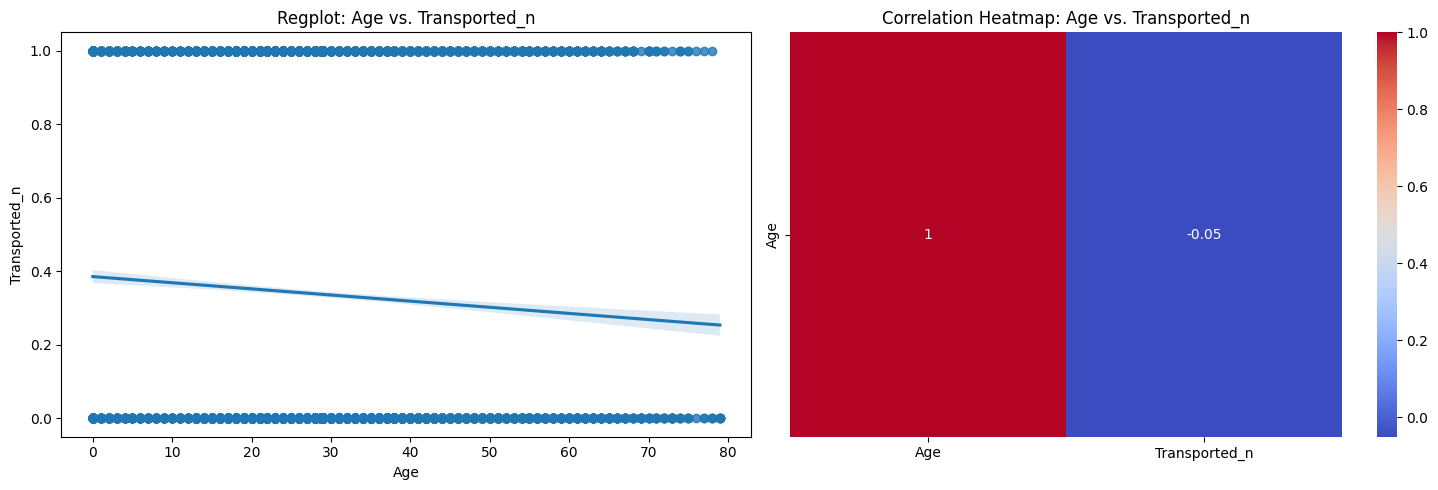

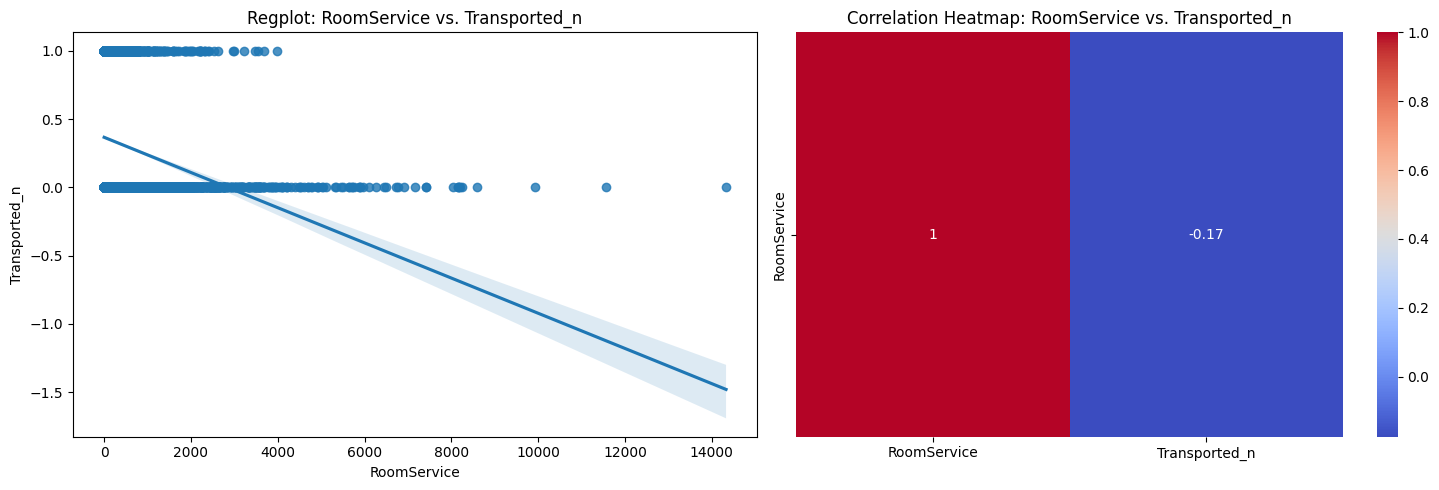

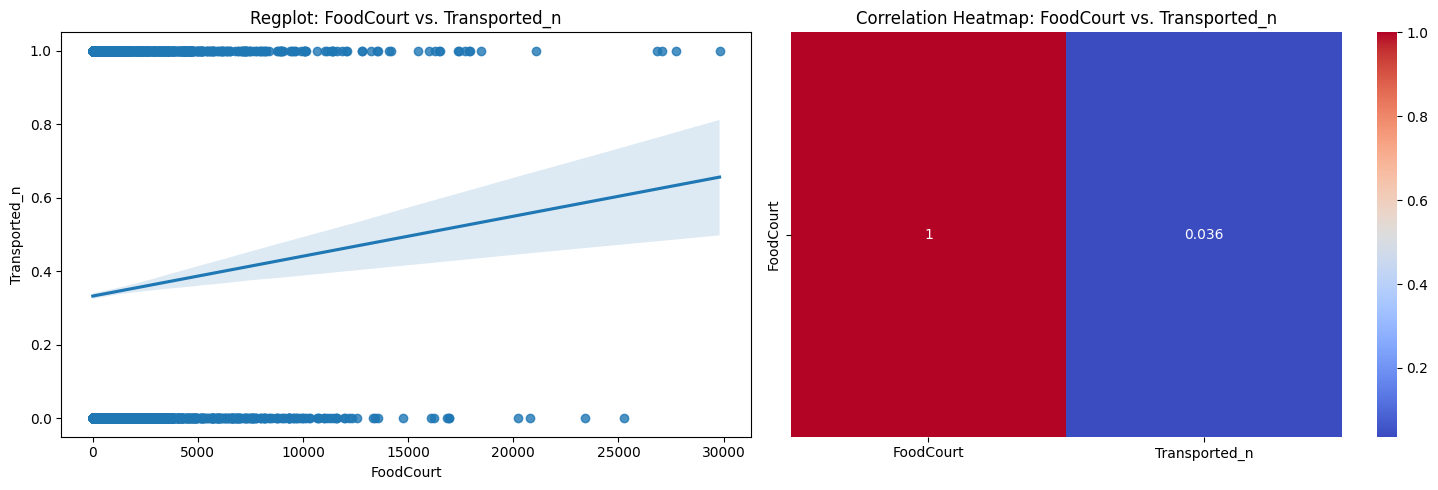

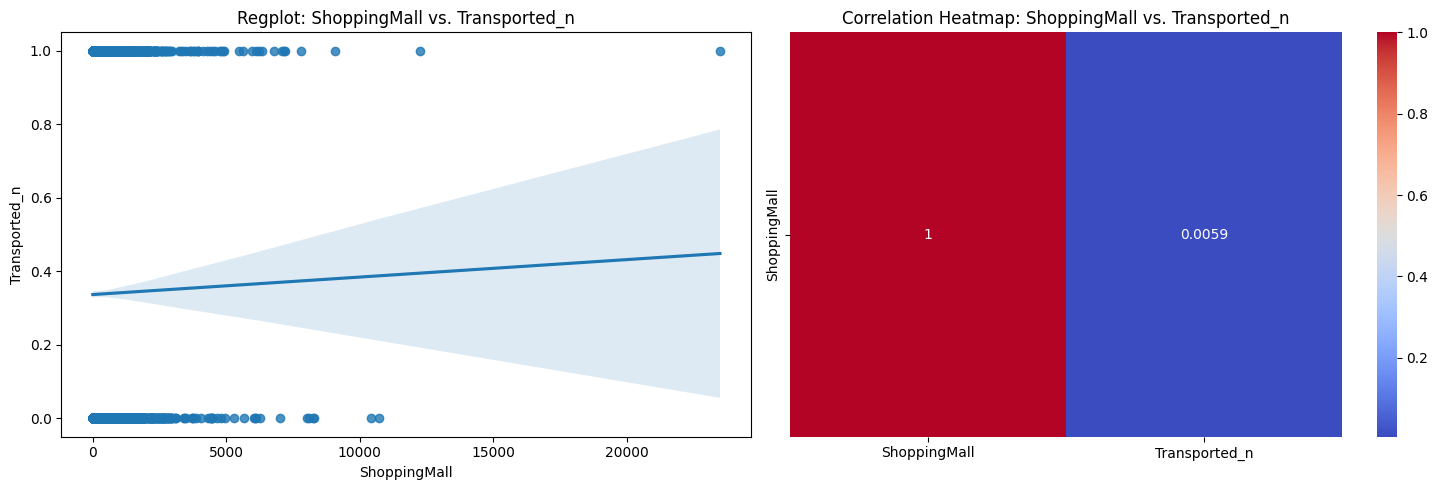

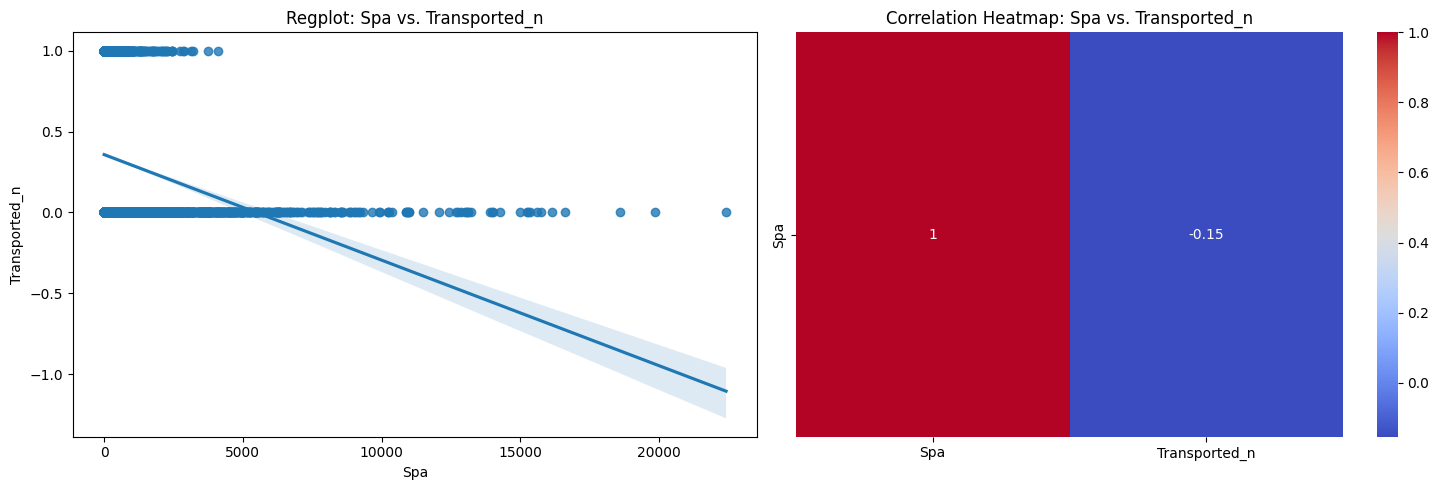

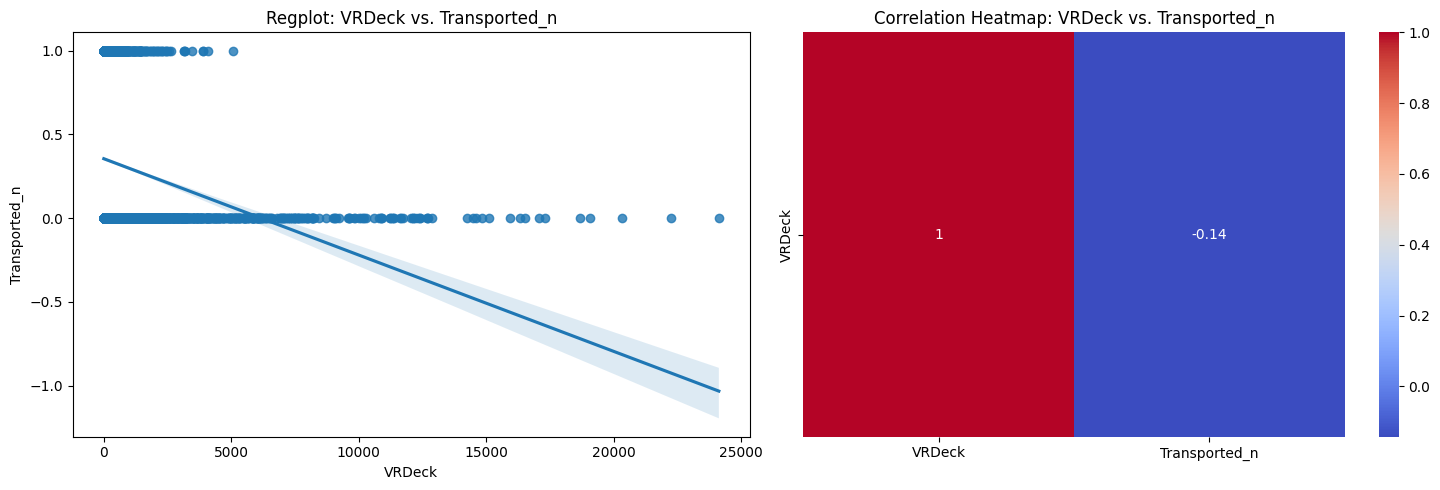

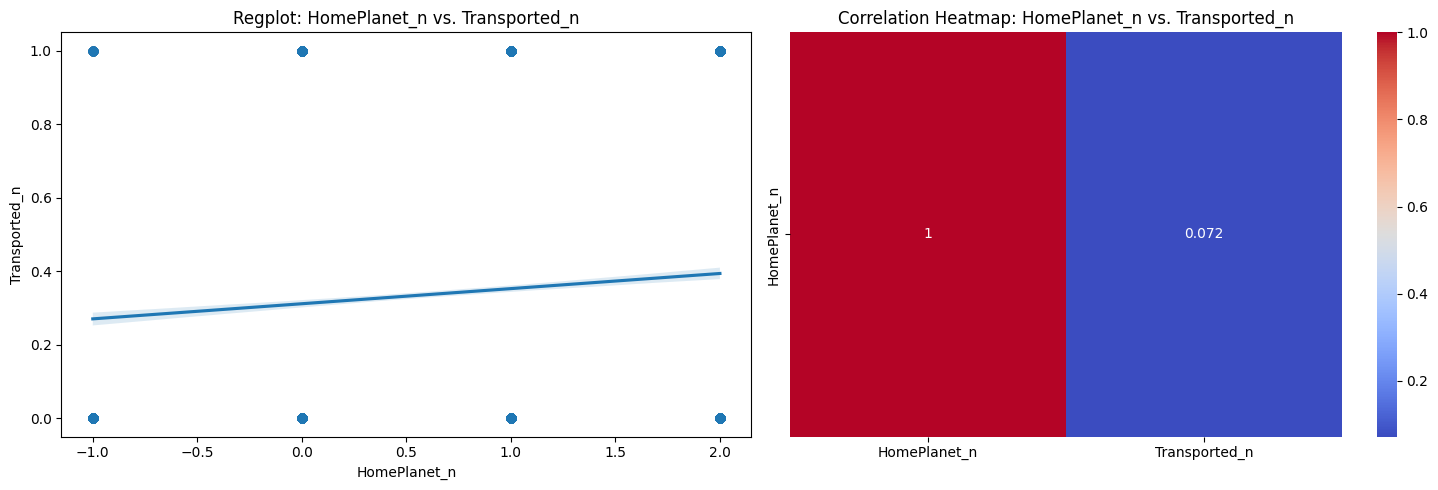

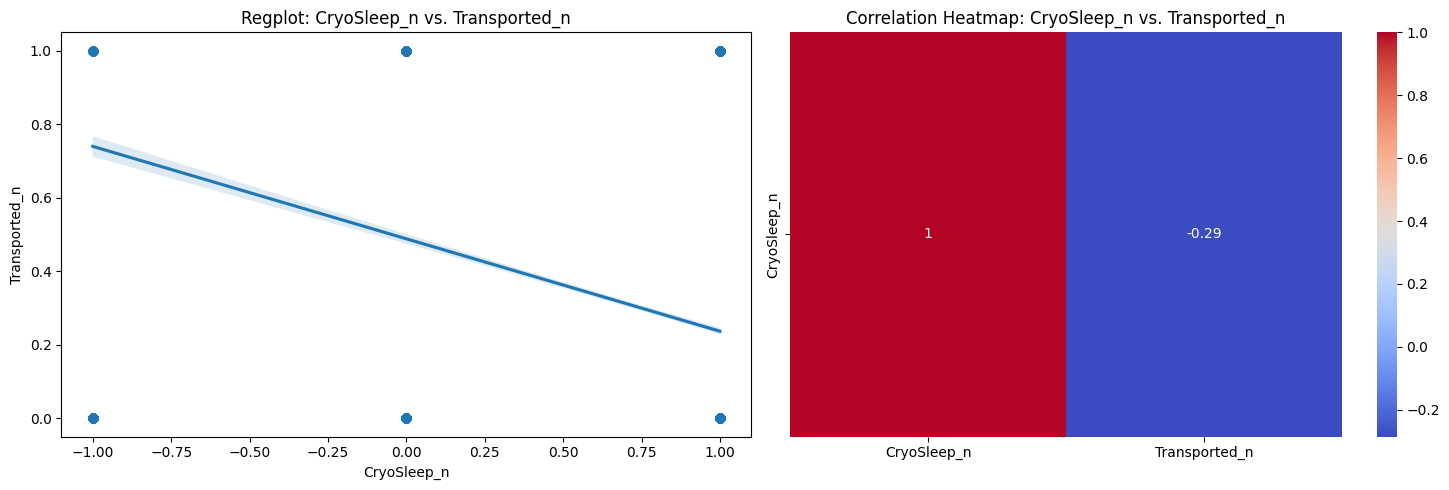

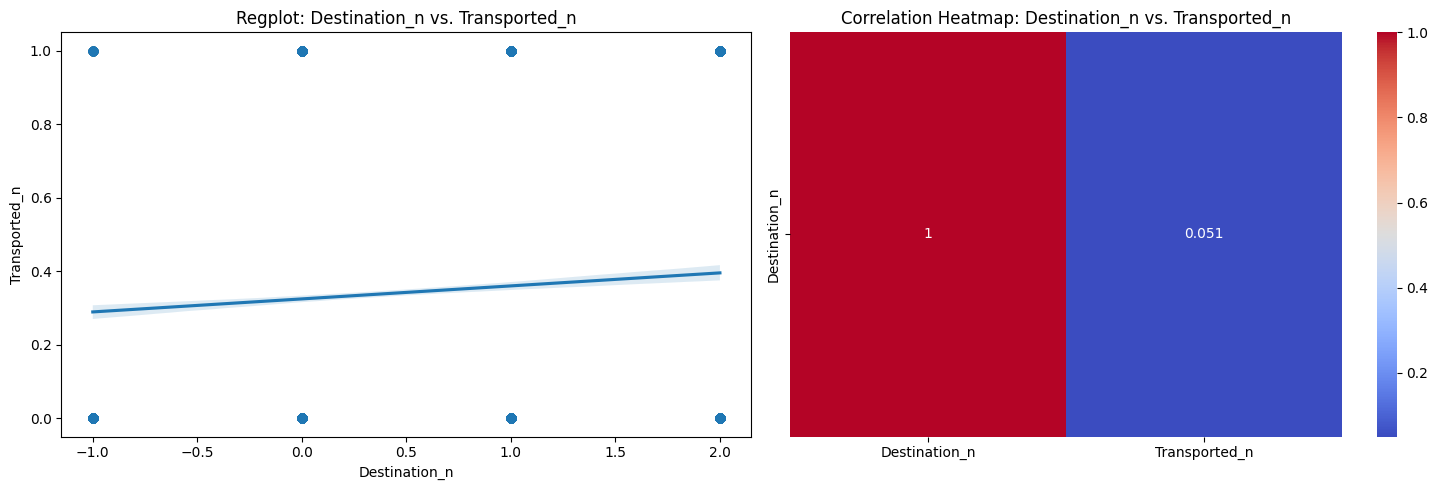

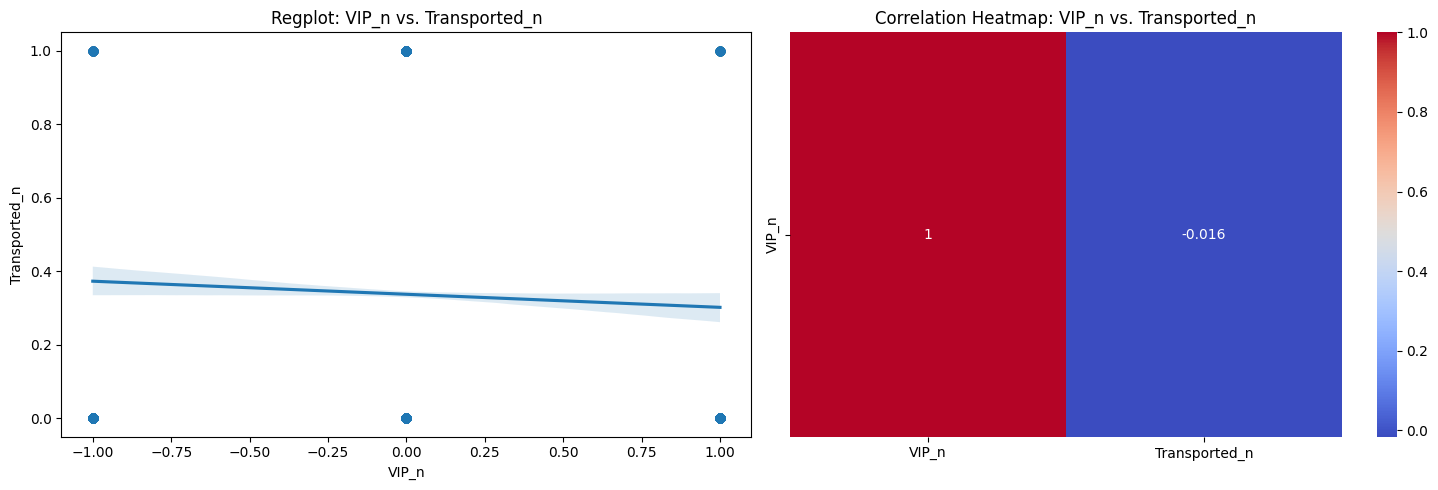

In [93]:
for column in total_data:
    #make exception for target column
    if column == target:
        continue
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    # Regression plot
    sns.regplot(x=column, y=target, data=total_data, ax=axes[0])
    axes[0].set_title('Regplot: {} vs. {}'.format(column, target))
    # Heatmap of correlation
    sns.heatmap(total_data[[column, target]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Correlation Heatmap: {} vs. {}'.format(column, target))
    # Show the plot for each column with target_1
    plt.tight_layout()
    plt.show()

In [94]:
def print_sorted_correlations(data, target):
    correlations = []
    for var in data.columns:
        if var != target:
            correlation_value = data[var].corr(data[target])
            correlations.append((var, correlation_value))
    
    # Sort by absolute value of correlation, from max to min
    sorted_correlations = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)
    
    for var, correlation_value in sorted_correlations:
        print(f"Correlation for {var} is: {correlation_value:.3f}")

print_sorted_correlations(total_data, 'Transported_n')

Correlation for CryoSleep_n is: -0.285
Correlation for RoomService is: -0.175
Correlation for Spa is: -0.154
Correlation for VRDeck is: -0.142
Correlation for HomePlanet_n is: 0.072
Correlation for Destination_n is: 0.051
Correlation for Age is: -0.050
Correlation for FoodCourt is: 0.036
Correlation for VIP_n is: -0.016
Correlation for ShoppingMall is: 0.006


After seeing this graphs, there are some conclusions:
- The variable with the most correlation is the Cryosleep, which relates to a spetial status.
- The variables that showed the most relation with the target were related to the locations in the spaceship.
- Variables realted to the age or the status of the passengers (Age or wether they were a VIP passenger, show no correlation).


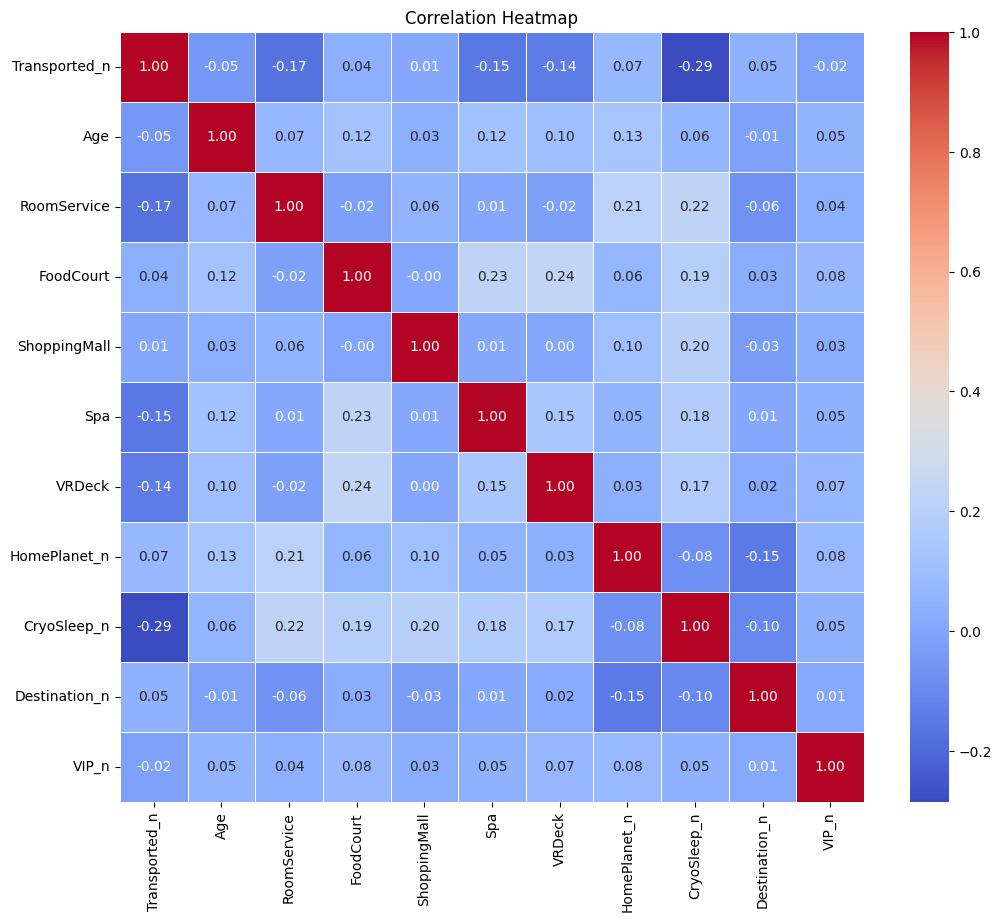

In [95]:
selection = [target] + [col for col in total_data.columns if col != target]

# Create the heatmap data
heatmap_data = total_data[selection]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

### Explanation 1: There is a correlation between the cabin assigned and the target variable.

Since results have shown that the transportation was some relation with places more than conditions, the following part will consist in a small analysis of the data related to the cabin, a possible explanation: 

In [96]:
#create cabin dataset
cabin_data = cabin_data.str.split('/', expand=True)
cabin_data.columns = ['Cabin1', 'Cabin2', 'Cabin3']

In [97]:
print(cabin_data['Cabin1'].unique())
print(cabin_data['Cabin2'].unique())
print(cabin_data['Cabin3'].unique())

['G' 'F' 'C' 'B' 'D' 'E' nan 'A' 'T']
['3' '4' '0' ... '1892' '1893' '1894']
['S' 'P' nan]


In [98]:
# Check the number of NaN values in Cabin1 and Cabin3
nan_cabin1 = cabin_data['Cabin1'].isna().sum()
nan_cabin3 = cabin_data['Cabin3'].isna().sum()

print(f"Number of NaN values in Cabin1: {nan_cabin1}")
print(f"Number of NaN values in Cabin3: {nan_cabin3}")


Number of NaN values in Cabin1: 299
Number of NaN values in Cabin3: 299


In [99]:
cabin_data = cabin_data.dropna(subset=['Cabin1', 'Cabin3'])

In [100]:
# create categoric mask
cat_variables = ['Cabin1', 'Cabin2', 'Cabin3']

# create numerical categoric variables
for var in cat_variables:
    cabin_data[var + '_n'] = pd.factorize(cabin_data[var])[0]
    
# drop the categoric variables
cabin_data = cabin_data.drop(['Cabin1', 'Cabin2', 'Cabin3'], axis=1)

# add target variable
cabin_data['Transported_n'] = total_data['Transported_n']

In [101]:
cabin_data

,Cabin1_n,Cabin2_n,Cabin3_n,Transported_n
0,0,0,0,0
1,1,1,0,0
2,2,2,0,0
3,2,3,0,0
4,1,4,0,0
...,...,...,...,...
12965,6,439,1,0
12966,0,1282,0,0
12967,0,1178,0,1
12968,5,472,0,0


In [102]:
cabin_data.corr()

,Cabin1_n,Cabin2_n,Cabin3_n,Transported_n
Cabin1_n,1.000000,-0.448519,-0.018417,-0.014708
Cabin2_n,-0.448519,1.000000,0.032455,0.022925
Cabin3_n,-0.018417,0.032455,1.000000,-0.075314
Transported_n,-0.014708,0.022925,-0.075314,1.000000


This shows that there is no relation between the cabin assigned to the passenger and the transported status.

### Explanation 2: There is a correlation between the passenger behaviour and the target variable.

The assumption is that higher spending on amenities indicates increased movement through the spaceship, which could impact the target variable. Therefore, a new variable will be created to represent the total amount of money spent on all amenities.

In [103]:
total_data['total_consumed'] = (
    total_data['RoomService'] +
    total_data['Spa'] +
    total_data['VRDeck']+
    total_data['FoodCourt']+
    total_data['ShoppingMall'])

correlation_value = total_data['total_consumed'].corr(total_data['Transported_n'])
print(correlation_value)


-0.13922996951008143


The initial results showed a poor correlation with the target variable. After testing various combinations, this particular combination yielded the best correlation. This suggests that the amount spent, as an indicator of the passenger's presence, may influence the outcome.

In [104]:
total_data['total_consumed_2'] = (
    total_data['RoomService'] +
    total_data['Spa'] +
    total_data['VRDeck'])

correlation_value = total_data['total_consumed_2'].corr(total_data['Transported_n'])
print(f"correlation is: {round(correlation_value,3)}")

correlation is: -0.245


Given the correlation between consumption and the target variable, another possibility emerged. If the column indicates whether the passenger used the amenity (instead of the billing amount), could this increase the correlation with the target? The variables will be transformed to test this hypothesis.

In [105]:
total_data['been_in_RoomService'] = total_data['RoomService'].apply(lambda x: 1 if x > 0 else 0)
total_data['been_in_Spa'] = total_data['Spa'].apply(lambda x: 1 if x > 0 else 0)
total_data['been_in_VRDeck'] = total_data['VRDeck'].apply(lambda x: 1 if x > 0 else 0)
total_data['been_in_FoodCourt'] = total_data['FoodCourt'].apply(lambda x: 1 if x > 0 else 0)
total_data['been_in_ShoppingMall'] = total_data['ShoppingMall'].apply(lambda x: 1 if x > 0 else 0)


In [106]:
been_in_var = ['been_in_RoomService',
                    'been_in_Spa',
                    'been_in_VRDeck',
                    'been_in_FoodCourt',
                    'been_in_ShoppingMall',
                    'Transported_n']

total_data[been_in_var].corr().round(3)

,been_in_RoomService,been_in_Spa,been_in_VRDeck,been_in_FoodCourt,been_in_ShoppingMall,Transported_n
been_in_RoomService,1.000,0.304,0.242,0.252,0.435,-0.248
been_in_Spa,0.304,1.000,0.425,0.445,0.309,-0.242
been_in_VRDeck,0.242,0.425,1.000,0.463,0.243,-0.226
been_in_FoodCourt,0.252,0.445,0.463,1.000,0.239,-0.160
been_in_ShoppingMall,0.435,0.309,0.243,0.239,1.000,-0.181
Transported_n,-0.248,-0.242,-0.226,-0.160,-0.181,1.000


By converting the values to 0 or 1 based on whether the passenger used the amenities, the correlation with the target variable increased. This adjustment can provide us with a clearer understanding of the relationship between amenities usage and the target outcome.

In [107]:
# Crear una nueva variable que combine todas las anteriores
total_data['total_consumed_2'] = (
    total_data['been_in_RoomService'] +
    total_data['been_in_Spa'] +
    total_data['been_in_VRDeck'] 
)

total_data['total_consumed_3'] = (
    total_data['been_in_FoodCourt'] +
    total_data['been_in_ShoppingMall']
)

total_data['has_consumed_high'] = total_data['total_consumed_2'].apply(lambda x: 1 if x > 0 else 0)
total_data['has_consumed_low'] = total_data['total_consumed_3'].apply(lambda x: 1 if x > 0 else 0)

# Calcular la correlación

correlation_value = total_data['has_consumed_high'].corr(total_data['Transported_n'])
print(f"If the passenger has used RoomService, Spa or VRDeck: {correlation_value.round(3)}")
correlation_value = total_data['has_consumed_low'].corr(total_data['Transported_n'])
print(f"If the passenger has used Food Court or Shopping Mall: {correlation_value.round(3)}")

If the passenger has used RoomService, Spa or VRDeck: -0.33
If the passenger has used Food Court or Shopping Mall: -0.251


Grouping the amenities into two categories also enhanced the correlation with the target variable. The correlation is negative, which suggests an inverse relationship between the use of amenities and the outcome. In other words, passengers who utilized the amenities are less likely to be transported.

FEATURE SELECTION

(1) Train / Test division

In [108]:
from sklearn.model_selection import train_test_split
variables = [x for x in total_data.columns if x != target]
# We divide the dataset into training and test samples
X = total_data.drop(target, axis = 1)[variables]
y = total_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_n,CryoSleep_n,Destination_n,VIP_n,total_consumed,total_consumed_2,been_in_RoomService,been_in_Spa,been_in_VRDeck,been_in_FoodCourt,been_in_ShoppingMall,total_consumed_3,has_consumed_high,has_consumed_low
12054,23.0,218.0,0.0,2267.0,497.0,0.0,2,1,1,0,2982.0,2,1,1,0,0,1,1,1,1
12367,18.0,2048.0,0.0,2.0,848.0,0.0,2,1,0,0,2898.0,2,1,1,0,0,1,1,1,1
2372,20.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
3038,20.0,173.0,436.0,258.0,0.0,0.0,2,1,0,0,867.0,1,1,0,0,1,1,2,1,1
4122,62.0,0.0,633.0,0.0,0.0,338.0,0,1,0,0,971.0,1,0,0,1,1,0,1,1,1


(2) Standard value scalation

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = variables)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = variables)
X_train_norm.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_n,CryoSleep_n,Destination_n,VIP_n,total_consumed,total_consumed_2,been_in_RoomService,been_in_Spa,been_in_VRDeck,been_in_FoodCourt,been_in_ShoppingMall,total_consumed_3,has_consumed_high,has_consumed_low
12054,-0.407504,-0.010320,-0.290863,3.530476,0.162722,-0.266579,1.644153,0.749052,0.930778,0.00416,0.531996,0.829010,1.335948,1.253849,-0.751827,-0.767605,1.339311,0.358709,0.841919,0.920104
12367,-0.758153,2.798610,-0.290863,-0.290105,0.471612,-0.266579,1.644153,0.749052,-0.544139,0.00416,0.502346,0.829010,1.335948,1.253849,-0.751827,-0.767605,1.339311,0.358709,0.841919,0.920104
2372,-0.617894,-0.344935,-0.290863,-0.293479,-0.274651,-0.266579,-0.766435,-1.114329,-0.544139,0.00416,-0.520568,-1.031846,-0.748532,-0.797544,-0.751827,-0.767605,-0.746653,-0.963481,-1.187763,-1.086833
3038,-0.617894,-0.079392,-0.010388,0.141713,-0.274651,-0.266579,1.644153,0.749052,-0.544139,0.00416,-0.214541,-0.101418,1.335948,-0.797544,-0.751827,1.302753,1.339311,1.680899,0.841919,0.920104
4122,2.327559,-0.344935,0.116340,-0.293479,-0.274651,0.022343,-0.766435,0.749052,-0.544139,0.00416,-0.177832,-0.101418,-0.748532,-0.797544,1.330093,1.302753,-0.746653,0.358709,0.841919,0.920104


(3) Features selection

In [118]:
selection = ['CryoSleep_n', 'has_consumed_high', 'has_consumed_low']
X_train_sel = X_train_norm[selection]
X_test_sel = X_test_norm[selection]

(4) CSV Creation

In [119]:
X_train_sel[target] = list(y_train)
X_test_sel[target] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_dataset_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_dataset_test.csv", index=False)

C:\Users\Francesc\AppData\Local\Temp\ipykernel_14988\3332784380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel[target] = list(y_train)
C:\Users\Francesc\AppData\Local\Temp\ipykernel_14988\3332784380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel[target] = list(y_test)
